In [15]:
import yfinance as yf
import matplotlib.pyplot as plt
# Import pandas
import pandas as pd
# Download the datafile from yfinance
data = yf.download("BTC-USD", start="2019-01-02", end="2020-04-30")[['Close']] #Google close price in given range
data.index = pd.to_datetime(data.index) #put time as index
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-01-01,3843.52
2019-01-02,3943.41
2019-01-03,3836.74
2019-01-04,3857.72
2019-01-05,3845.19


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2019-01-02 to 2020-04-29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       484 non-null    float64
 1   Close_diff  484 non-null    float64
dtypes: float64(2)
memory usage: 11.3 KB


In [16]:
from statsmodels.tsa.stattools import adfuller  # ADF model

result = adfuller(data.Close)

print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -1.77
5% Critical Value: -2.87
p-value: 0.40


Our p-value is > 5% which means that we accept the hypothesis H0 of considering this dataset as not stationary

In [17]:
import numpy as np

# Take the log difference to make data stationary

data['Close'] = np.log(data['Close'])
data['Close_diff'] = data['Close'].diff()

data = data.drop(data.index[0])
data.head()

<ipython-input-17-9a762b640944>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = np.log(data['Close'])
<ipython-input-17-9a762b640944>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close_diff'] = data['Close'].diff()


,Close,Close_diff
Date,,
2019-01-02,8.279801,0.025657
2019-01-03,8.252379,-0.027422
2019-01-04,8.257831,0.005452
2019-01-05,8.254579,-0.003251
2019-01-06,8.313027,0.058447


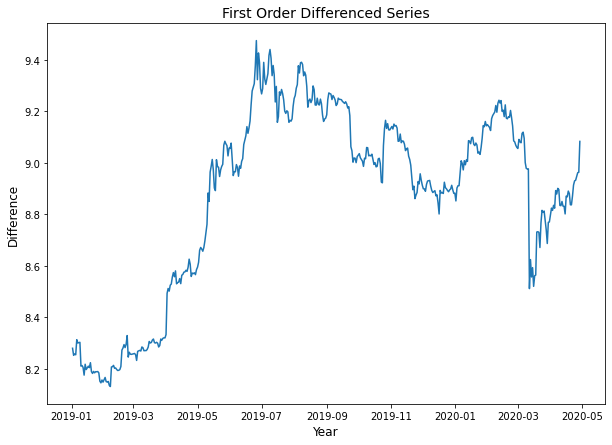

In [18]:
# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Close'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

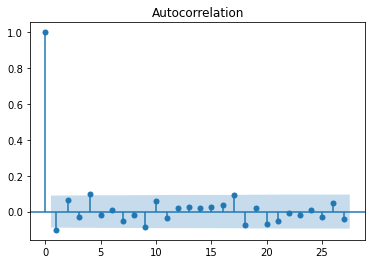

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['Close_diff'])
 
plt.show()


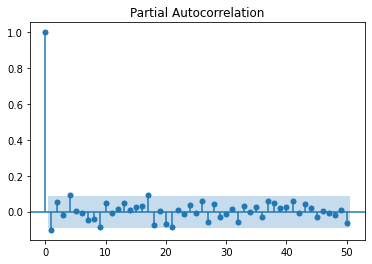

In [21]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

plot_pacf(data['Close_diff'], alpha =0.05, lags=50)

plt.show()


In [24]:
# Calculating AR and MA models

# Splitting data into train (2/3) and test(1/3)



In [ ]:
# I didn't know how to proceed from here :(